In [1]:
!pip install plotly

In [1]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import yfinance as yf

In [35]:
ticker = "GOOG"
period = "1y"
interval = "1d"
data_df = yf.download(ticker, period=period, interval=interval)
data_df


*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-04-12,158.439575,160.937738,157.852360,158.653558,16968200
2024-04-15,155.593048,160.071835,155.413889,159.524424,21140900
2024-04-16,155.264603,156.488800,154.319084,154.906299,15413200
2024-04-17,156.140472,157.932977,155.398974,156.449009,16237800
2024-04-18,156.717712,157.737874,155.473605,156.185231,14016100
...,...,...,...,...,...
2025-04-07,149.240005,154.929993,142.660004,143.389999,47823000
2025-04-08,146.580002,154.440002,145.210007,153.574997,35304400


In [36]:
data_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
data_df

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-12,158.439575,160.937738,157.852360,158.653558,16968200
2024-04-15,155.593048,160.071835,155.413889,159.524424,21140900
2024-04-16,155.264603,156.488800,154.319084,154.906299,15413200
2024-04-17,156.140472,157.932977,155.398974,156.449009,16237800
2024-04-18,156.717712,157.737874,155.473605,156.185231,14016100
...,...,...,...,...,...
2025-04-07,149.240005,154.929993,142.660004,143.389999,47823000
2025-04-08,146.580002,154.440002,145.210007,153.574997,35304400
2025-04-09,161.059998,161.869995,145.809998,146.330002,46479500


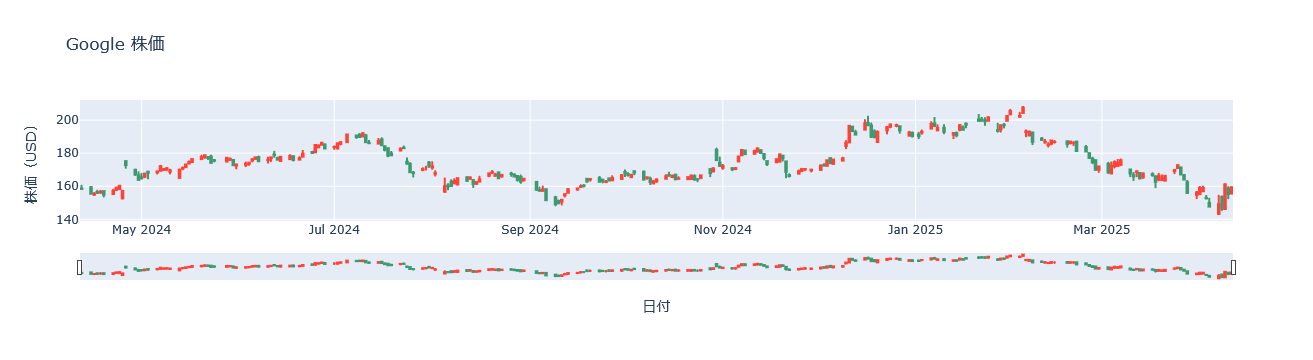

In [38]:
fig = go.Figure(data=[
    go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close #["Close"]
    )
])

fig.update_layout(
    title="Google 株価",
    xaxis_title="日付",
    yaxis_title="株価（USD）"
)

fig.show()

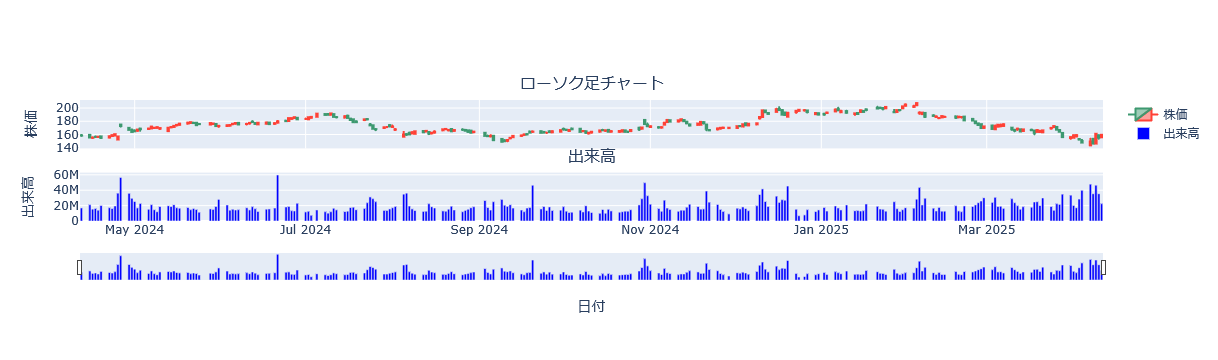

In [51]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True, vertical_spacing=0.2, subplot_titles=("ローソク足チャート","出来高"))

fig.add_trace(go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close,#["Close"]
        name="株価"
    ), row=1,col=1)

fig.add_trace(go.Bar(
        x=data_df.index,
        y=data_df["Volume"],
        marker_color="blue",
        name="出来高"
    ), row=2,col=1)

fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis2_rangeslider_visible=True,
    xaxis2_title="日付",
    yaxis_title="株価",
    yaxis2_title="出来高"
)

fig.show()              